# Is democracy a guarantee of liberty ?

**Author** : Lucile LAPRAY

**Date** : 11/30/23

## 1. Introduction

Freedom is an essential principle of democracy (according to the *United Nations*) so both should be correlated. However, the invidual's influence within the political system may have an effect on both their impression on how democratically the country is being governed and their perception of how free to make their own choices they are.

**Is individual freedom dependent on the political system in place and the individual's power of intervention in it?**

If it were the case, we should observe that :
- **Prediction 1 :** The more you feel like you have a say in what the governement does, the more you consider your country to be democratic.
- **Prediction 2 :** The more democratic you feel your country is and the more influence you have, the freer you feel.


## 2. Library import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

## 3. Data import

In [4]:
df = pd.read_csv("WVS-7_dataset_2017-2020_v5.csv")
display(df)

C:\Users\lucil\AppData\Local\Temp\ipykernel_17032\2939614021.py:1: DtypeWarning: Columns (345,347,349,574,575,576) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("WVS-7_dataset_2017-2020_v5.csv")


,version,doi,A_WAVE,A_YEAR,A_STUDY,B_COUNTRY,B_COUNTRY_ALPHA,C_COW_NUM,C_COW_ALPHA,D_INTERVIEW,...,WVS_Polmistrust_PartyVoter,WVS_LR_MedianVoter,WVS_LibCon_MedianVoter,v2psbars,v2psorgs,v2psprbrch,v2psprlnks,v2psplats,v2xnp_client,v2xps_party
0,5-0-0 (2022-12-23),doi.org/10.14281/18241.20,7,2018,2,20,AND,232,AND,20070001,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,5-0-0 (2022-12-23),doi.org/10.14281/18241.20,7,2018,2,20,AND,232,AND,20070002,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,5-0-0 (2022-12-23),doi.org/10.14281/18241.20,7,2018,2,20,AND,232,AND,20070003,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,5-0-0 (2022-12-23),doi.org/10.14281/18241.20,7,2018,2,20,AND,232,AND,20070004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5-0-0 (2022-12-23),doi.org/10.14281/18241.20,7,2018,2,20,AND,232,AND,20070005,...,66.964286,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94273,5-0-0 (2022-12-23),doi.org/10.14281/18241.20,7,2022,2,909,NIR,202,NIRL,909070443,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94274,5-0-0 (2022-12-23),doi.org/10.14281/18241.20,7,2022,2,909,NIR,202,NIRL,909070444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94275,5-0-0 (2022-12-23),doi.org/10.14281/18241.20,7,2022,2,909,NIR,202,NIRL,909070445,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94276,5-0-0 (2022-12-23),doi.org/10.14281/18241.20,7,2022,2,909,NIR,202,NIRL,909070446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data set used is a questionnaire survey from the Wave 7 (2017 to 2020) of the World Value Survey, a global research project created by Ronald Inglehart in 1981 and led by an international network of social scientists.

## 4. Data manipulation

In [5]:
# We only study positive values as negative ones aren't on the ordinal scale


# Question 251 : How democratically is your country being governed today?
# from 1 to 10 : 1 meaning not at all democratic, 10 meaning completely democratic
positive_1_df = df[df['Q251'] > 0]
how_dem = positive_1_df['Q251'].value_counts()

# question 48 : How much freedom of choice and control you feel you have over the way your life turns out ?
# from 1 to 10 : 1 meaning no choice at all, 10 meaning a great deal of choices
positive_2_df = df[df['Q48'] > 0]
freedom_of_choice = positive_2_df['Q48'].value_counts()

# How much does the political system in your country allow people like you to have a say in what the government does ?
# from 1 to 5 : 1 meaning a great deal of influence, 5 meaning no influence at all
positive_3_df = df[df['Q234A'] > 0]
say_gvt = positive_3_df['Q234A'].value_counts()


filtered_df = df[(df['Q251'] > 0) & (df['Q234A'] > 0) & (df['Q48'] > 0)]

## 5. Data description

c:\Users\lucil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lucil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lucil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lucil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

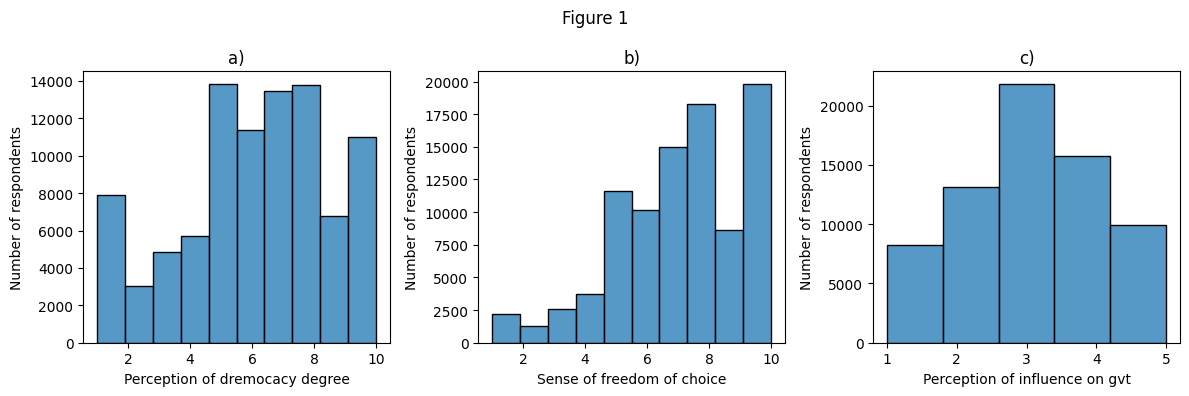

In [6]:
fig1 = plt.figure(figsize = (12, 4))
fig1.suptitle("Figure 1")

# Figure 1.a : Distribution of people's country democracy degree
plt.subplot(1, 3, 1) 
sns.histplot(positive_1_df['Q251'], bins=len(how_dem), kde=False)
plt.xlabel('Perception of dremocacy degree')
plt.ylabel('Number of respondents')
plt.title("a)")

# Figure 1.b : Distribution of people's sense of freedom of choice
plt.subplot(1, 3, 2) 
sns.histplot(positive_2_df['Q48'], bins=len(freedom_of_choice), kde=False)
plt.xlabel('Sense of freedom of choice')
plt.ylabel('Number of respondents')
plt.title("b)")

# Figure 1.c : Distribution of people's power over their government's decisions
plt.subplot(1, 3, 3) 
sns.histplot(positive_3_df['Q234A'], bins=len(say_gvt), kde=False)
plt.xlabel('Perception of influence on gvt')
plt.ylabel('Number of respondents')
plt.title("c)")

plt.tight_layout()
plt.savefig('democracy_fig1.jpg')
plt.show()

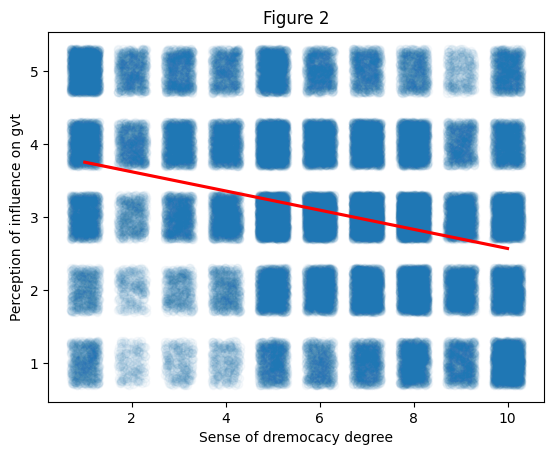

In [7]:
# Scatter plot with jitter for clarity : linear regression in red
sns.regplot(x=filtered_df['Q251'], y=filtered_df['Q234A'], x_jitter=0.3, y_jitter=0.3, scatter_kws={'alpha':0.03}, line_kws = {"color": "red"})
plt.gca().set_xlabel("Sense of dremocacy degree")
plt.gca().set_ylabel("Perception of influence on gvt")
plt.title("Figure 2")

plt.savefig('democracy_fig2.jpg')
plt.show()

## 6. Data modelling

In [ ]:
# Simple linear regression predicting power over decisions with democracy
model = smf.ols(formula = 'Q251 ~ Q234A', data = filtered_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Q251   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     6295.
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:29:57   Log-Likelihood:            -1.5931e+05
No. Observations:               67356   AIC:                         3.186e+05
Df Residuals:                   67354   BIC:                         3.186e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1120      0.027    298.690      0.000       8.059       8.165
Q234A         -0.6514      0.008    -79.339      0.000      -0.667      -0.635
==============================================================================
Omnibus:                     2612.223   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2055.919
Skew:                          -0.344   Prob(JB):                         0.00
Kurtosis:                       2.491   Cond. No.                         9.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Multi-linear regression freedom of choice with democracy and influence
model = smf.ols(formula = 'Q48 ~ Q234A + Q251', data = filtered_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Q48   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     463.2
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          1.65e-200
Time:                        23:29:57   Log-Likelihood:            -1.5000e+05
No. Observations:               67356   AIC:                         3.000e+05
Df Residuals:                   67353   BIC:                         3.000e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8853      0.036    190.926      0.000       6.815       6.956
Q234A         -0.0528      0.007     -7.066      0.000      -0.067      -0.038
Q251           0.0881      0.003     26.245      0.000       0.081       0.095
==============================================================================
Omnibus:                     4047.371   Durbin-Watson:                   1.705
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4829.015
Skew:                          -0.656   Prob(JB):                         0.00
Kurtosis:                       3.032   Cond. No.                         30.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 7. Results

People saying their country is democratic also state that they feel rather listened to by their government when it comes to taking decisions (see *Fig. 2*, $\beta_1 = -0.6514$, because : very democratic = 10 (10/10) and consulted = 1(1/5)) which is really significant but doesn't explain the variation ($t_1 = -79.339$ $p_1 = 0.000$, $R^2_1 = 0.085$). Moreover, people feel slightly freer when they rate their country as highly democratic and when they feel like they have a say in politics ($\beta_2 = 0.0881$ and $\beta_3 = -0.0528$, once again with the "consulted" scale upside down) and if both are significant, it doesn't seem to variate much ($p_2 = 0.000$ and $p_3 = 0.000$, $R^2_2 = 0.014$).

## 8. Conclusion

We can see that with the studied data - that's to say the data of people who had responded on the ordinal scale for the three questions - that people who are feeling like a country is governed democratically also feel listened and partly influential over their government's decisions. The results also indicate that people's sense of their freedom of choice goes higher as the two variables mentioned before increase.

In that way, democracy and consultation can be vectors of freedom. However, the results aren't enough to prove a causality. An hypothesis could be that richer countries value democracy more, and their inhabitants being richer, their freedom wouldn't be restricted by a lack of money.